# WISE VS Spitzer

In [1]:
# For Sky Plots se: http://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html
import numpy as np
from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn
import warnings
import os, glob, getpass, sys
# user = getpass.getuser()
# sys.path.append('/Users/' + user + '/Dropbox/my_python_packages')

from astropy.coordinates import SkyCoord
from astropy.utils.exceptions import AstropyWarning
from astropy import units as u
import functions as fcs

In [2]:
# Read Odisea Sample ==========
path     = '/Users/hcanovas/Astrofisica/papers/published/2018_cieza_git/results/' # Images Path
odisea_A = Table.read('odisea_samples/SAMPLE_A_C4.txt', format = 'ascii.fast_no_header') ; odisea_A.label = 'Sample A'
odisea_B = Table.read('odisea_samples/SAMPLE_B_C5.txt', format = 'ascii.fast_no_header') ; odisea_B.label = 'Sample B'

# Add coordinates =============
for inp in [odisea_A, odisea_B]:
    coords = SkyCoord(inp['col1'], inp['col2'], unit=(u.hourangle, u.deg))
    inp['ra']  = [coord.ra.deg  for coord in coords]
    inp['dec'] = [coord.dec.deg for coord in coords]
    
    for col in ['ra', 'dec']:
        inp[col].unit   = u.degree
        inp[col].format = "10.5f"

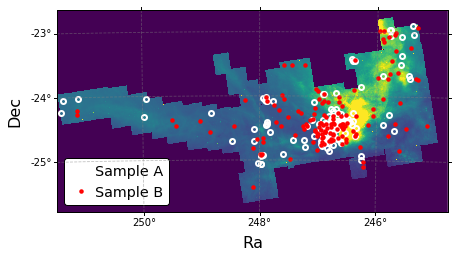

In [3]:
# Plot IRAC Image =============
irac  = fcs.readfits(path + 'OPH_ALL_COMB_IRAC4_mosaic_rotated_trimmed.fits')
dummy = fcs.make_img(irac['data'], irac['hdr'], irac['wcs'], sample_A=odisea_A, sample_B=odisea_B, vmin=0, vmax=40, mec_b='r', figname='odisea_irac4.pdf', ftsize = 16)

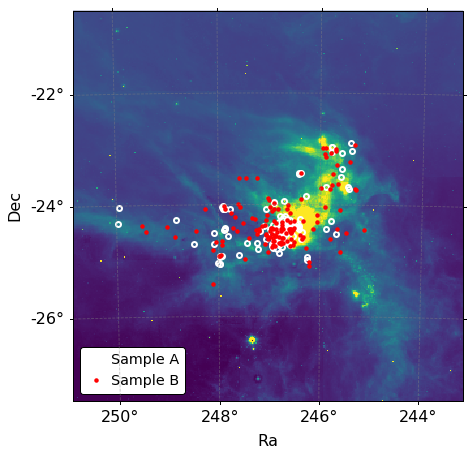

In [4]:
# Plot WISE Image =============
wise  = fcs.readfits(path + 'WISE_12.fits')
dummy = fcs.make_img(wise['data'], wise['hdr'], wise['wcs'], sample_A=odisea_A, sample_B=odisea_B, vmin=800, vmax=1200, mec_b='r', figname='odisea_wise.pdf', ftsize = 16)